# Model for predicting labour cost 

We have dataset, named vehicle and we are going to perform multiple linear regression and we will be trying to develop a regression model for the given dataset.

Data retrived from : https://drive.google.com/open?id=0B5W8CO0Gb2GGUVNyZ1JqMW1NZjA

In [3]:
setwd("C:/Users/Kapil Chicago/Desktop/Jupyter Notebook/Vehicle Regression")

In [5]:
vehicle<-read.csv("vehicle.csv")

In [7]:
#names of the column in our dataset
names(vehicle)

[1] "vehicle" "fm"      "Mileage" "lh"      "lc"      "mc"      "State"

In [8]:
#Let’s see how our dataset looks like.  
head(vehicle)

vehicle,fm,Mileage,lh,lc,mc,State
1,0,863,1.1,66.30,697.23,MS
2,10,4644,2.4,233.03,119.66,CA
3,15,16330,4.2,325.08,175.46,WI
4,0,13,1.0,66.64,0.00,OR
5,13,22537,4.5,328.66,175.46,AZ
6,21,40931,3.1,205.28,175.46,FL


Corelation matrix

In [27]:
cor(vehicle[,3:6], method = "pearson")

,Mileage,lh,lc,mc
Mileage,1.00000000,0.07540572,0.06652076,0.09207116
lh,0.07540572,1.00000000,0.97518184,0.57083073
lc,0.06652076,0.97518184,1.00000000,0.55332429
mc,0.09207116,0.57083073,0.55332429,1.00000000


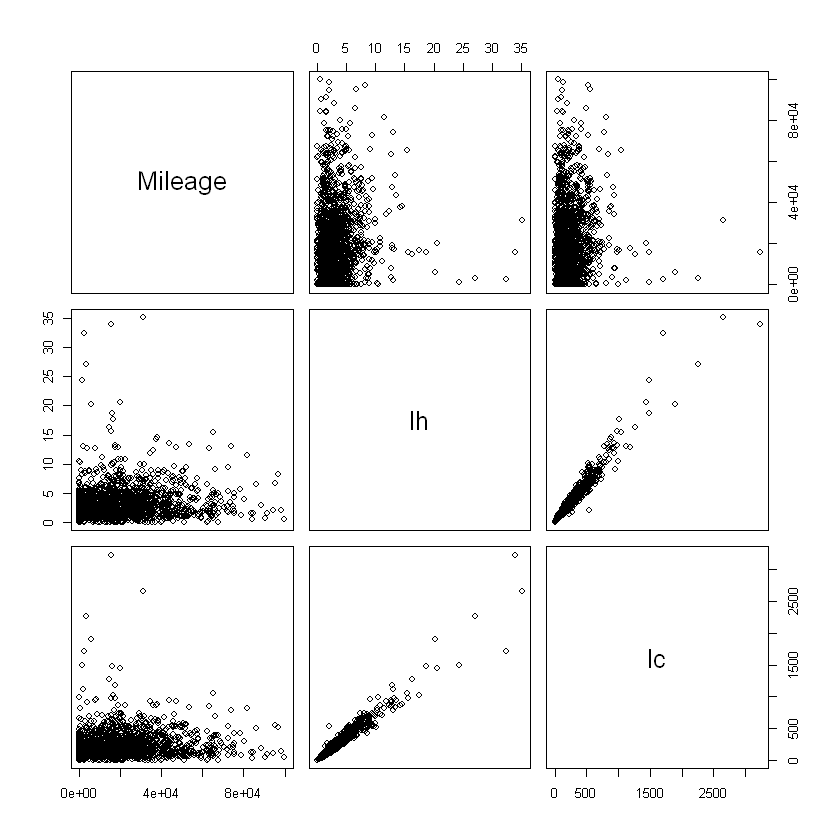

In [6]:
#Scatter plot to see the relation between our variables.

pairs(vehicle[3:5])

1) In above graph ,we can see lc (labour cost) and lh(labour hour)  are strongly corelated.
2) There is very weak corelation between mileage vs (lc and lh)


#Let's try to develop a linear regression model  

In [11]:
#full model
full<-lm(lc~Mileage+lh,data =vehicle)
full


Call:
lm(formula = lc ~ Mileage + lh, data = vehicle)

Coefficients:
(Intercept)      Mileage           lh  
  1.375e+00   -8.475e-05    7.355e+01  


# our full model 
lc =1.375e+00-8.475e-05*Mileage +7.355e+01*lh

In [12]:
summary(full)


Call:
lm(formula = lc ~ Mileage + lh, data = vehicle)

Residuals:
    Min      1Q  Median      3Q     Max 
-672.79  -14.73   -0.62   12.89  741.05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.375e+00  2.218e+00    0.62    0.535    
Mileage     -8.475e-05  6.622e-05   -1.28    0.201    
lh           7.355e+01  4.155e-01  177.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48.62 on 1621 degrees of freedom
Multiple R-squared:  0.951,	Adjusted R-squared:  0.951 
F-statistic: 1.574e+04 on 2 and 1621 DF,  p-value: < 2.2e-16


check p-values and check stars :
1) ***  = highly significant
2) no start = then no significant role

In [ ]:
Here, in our model  mileage is not construbuting, so lets try to build new model by removing Mileage. Mileage is not significantly contributing to the model

New model

In [14]:
reduced<-lm(lc~lh,data =vehicle)
summary(reduced)


Call:
lm(formula = lc ~ lh, data = vehicle)

Residuals:
    Min      1Q  Median      3Q     Max 
-670.09  -14.72   -0.32   12.96  742.70 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.2359     1.8262  -0.129    0.897    
lh           73.5088     0.4144 177.387   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 48.63 on 1622 degrees of freedom
Multiple R-squared:  0.951,	Adjusted R-squared:  0.9509 
F-statistic: 3.147e+04 on 1 and 1622 DF,  p-value: < 2.2e-16


# our new model
lc= -0.2359+ 73.5088*lh

# ANOVA 

In [17]:
anova(full,reduced) # analysis of variance 

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1621,3831889,NA,NA,NA,NA
1622,3835760,-1,-3871.015,1.637551,0.2008449


pr =0.2008449
Adding mileage is not significantly contributing to regression model.
So,basically, resuced form model is better than full model. 

lc= -0.2359+ 73.5088*lh


In [ ]:
Since we have developed regression model, then we can also predict the result:

# Prediction
If lh =10 hours, then what will be the labor cost:

In [22]:
predict(reduced,data.frame(lh=10),interval ="confidence")

,fit,lwr,upr
1,734.8522,728.9201,740.7844


Results: 
1) Average labor cost fit(Average)= 734.8522
2) Upper and lower values for labor cost are 728.9201 and 740.7844 respectively.

    